In [30]:
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import cmasher as cmr

ModuleNotFoundError: No module named 'cmasher'

In [2]:
f = open("../run/carma/hj_diamondback_test.txt")
NZ, NGROUP, NELEM, NBIN, NGAS, nstep, iskip = np.array(f.readline().split(), dtype=int)

r = np.zeros(NBIN)
rmass = np.zeros((NBIN, NGROUP))

for i in range(NGROUP):
    for j in range(NBIN):
        _, _, r[j], rmass[j, i], _, _, _ = np.array(f.readline().split(), dtype=float)


kzz = np.zeros(NZ)
P = np.zeros(NZ)
T = np.zeros(NZ)
Z = np.zeros(NZ)

for i in range(NZ):
    _, Z[i], _, P[i], T[i], kzz[i] = np.array(f.readline().split(), dtype=float)


f.readline()
for j in range(NBIN):
    for i in range(NZ):
        f.readline()


NT = int(nstep/iskip)

numden = np.zeros((NZ, 18, NBIN, NT))

for i in range(NT):
    t_step = f.readline()
    if t_step:
        # print(t_step)
        for j in range(NBIN):
            for k in range(NZ):
                line = np.array(f.readline().split(), dtype=float)
                (_, _, numden[k, 1, j, i], 
                numden[k, 2, j, i], 
                numden[k, 4, j, i], 
                numden[k, 6, j, i], 
                numden[k, 8, j, i], 
                numden[k, 10, j, i], 
                numden[k, 12, j, i], 
                numden[k, 14, j, i],
                numden[k, 15, j, i],
                numden[k, 16, j, i],
                numden[k, 17, j, i],
                _, _, _, _, _, _, _, _, _, _,
                _, _, _, _, _, _, _, _, _) = line
    else:
        break


f.close()

In [4]:
element_to_group = {
    1:  1,
    2:  2,
    3:  2,
    4:  3,
    5:  3,
    6:  4,
    7:  4,
    8:  5,
    9:  5,
    10: 6,
    11: 6,
    12: 7,
    13: 7,
    14: 8,
    15: 9,
    16: 10,
    17: 11,
    18: 11    
}

In [49]:
print(f"{int(float(t_step.strip())):.2e}")

1.00e+08


/home/wcukier/ipykernel_3359484/3226287023.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(np.log10(numden[:, iele, :, -10]*rmass[:, element_to_group[iele]-1]), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=100, vmax = -9, vmin=-18, cmap="magma", extend="min")


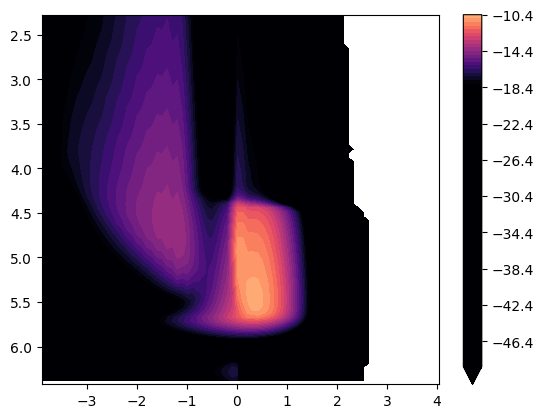

In [55]:

iele = 1

plt.contourf(np.log10(numden[:, iele, :, -10]*rmass[:, element_to_group[iele]-1]), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=100, vmax = -9, vmin=-18, cmap="magma", extend="min")
# plt.contour(numden[:, igroup, :, 30]*rmass[:, element_to_group[igroup]-1], extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=3, colors="white")
# plt.contourf(np.log10(numden[:, iele, :, -10]), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=100, cmap="magma", extend="min")

# plt.clim(-18, -9)

plt.colorbar()
plt.gca().invert_yaxis()

/home/wcukier/ipykernel_3359484/2157067964.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(np.log10(numden[:, iele, :, -10]), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=100, cmap="magma", extend="min")


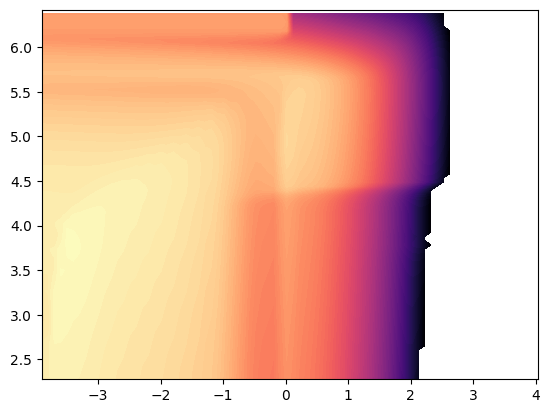

In [57]:
plt.contourf(np.log10(numden[:, iele, :, -10]), extent=(np.log10(r[0]), np.log10(r[-1]), np.log10(P[0]), np.log10(P[-1])), levels=100, cmap="magma", extend="min")


In [36]:
rmass[:, 1]

array([3.3427e-23, 6.6853e-23, 1.3371e-22, 2.6741e-22, 5.3482e-22,
       1.0696e-21, 2.1393e-21, 4.2786e-21, 8.5572e-21, 1.7114e-20,
       3.4229e-20, 6.8458e-20, 1.3692e-19, 2.7383e-19, 5.4766e-19,
       1.0953e-18, 2.1906e-18, 4.3813e-18, 8.7626e-18, 1.7525e-17,
       3.5050e-17, 7.0101e-17, 1.4020e-16, 2.8040e-16, 5.6080e-16,
       1.1216e-15, 2.2432e-15, 4.4864e-15, 8.9729e-15, 1.7946e-14,
       3.5891e-14, 7.1783e-14, 1.4357e-13, 2.8713e-13, 5.7426e-13,
       1.1485e-12, 2.2971e-12, 4.5941e-12, 9.1882e-12, 1.8376e-11,
       3.6753e-11, 7.3506e-11, 1.4701e-10, 2.9402e-10, 5.8805e-10,
       1.1761e-09, 2.3522e-09, 4.7044e-09, 9.4087e-09, 1.8817e-08,
       3.7635e-08, 7.5270e-08, 1.5054e-07, 3.0108e-07, 6.0216e-07,
       1.2043e-06, 2.4086e-06, 4.8173e-06, 9.6345e-06, 1.9269e-05,
       3.8538e-05, 7.7076e-05, 1.5415e-04, 3.0831e-04, 6.1661e-04,
       1.2332e-03, 2.4664e-03, 4.9329e-03, 9.8658e-03, 1.9732e-02,
       3.9463e-02, 7.8926e-02, 1.5785e-01, 3.1570e-01, 6.3141e

In [12]:
np.shape(Z)

(89,)

18